# Plotting test error for parameters values of random forest model in chapter 8 lab.

## Preparing the data

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

boston = pd.read_csv('../../datasets/Boston.csv', index_col=0)
boston = boston.reset_index(drop=True)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


## Grid search for random forest model

We're using [`sklearn.ensemble.RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) - the parameters `n_estimators`, `max_features` correspond to the parameters `ntree` and `mtry` respectively, for the `R` function `randomForest()`.

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

n_estimators, max_features = np.arange(1, 51), np.arange(1, 14)
params = {'n_estimators': n_estimators, 'max_features': max_features}
rf_search = GridSearchCV(RandomForestRegressor(), param_grid=params, scoring='neg_mean_squared_error', cv=5)
rf_search.fit(boston.drop(columns=['medv']), boston['medv'])

/anaconda3/envs/islr/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [24]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

rf_search_results = pd.DataFrame(rf_search.cv_results_)
rf_search_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003891,0.000834,0.001949,0.000402,1,1,"{'max_features': 1, 'n_estimators': 1}",-21.991667,-85.189010,-54.552079,...,-64.012530,23.806851,648,-14.603713,-14.161111,-11.699358,-16.489481,-12.779235,-13.946580,1.634436
1,0.007109,0.000531,0.002835,0.000614,1,2,"{'max_features': 1, 'n_estimators': 2}",-23.077500,-40.479134,-41.309505,...,-49.661359,20.626230,646,-9.532983,-8.897994,-4.985086,-8.101160,-8.354475,-7.974340,1.573450
2,0.005619,0.001508,0.001752,0.000513,1,3,"{'max_features': 1, 'n_estimators': 3}",-17.650196,-41.920968,-80.304345,...,-45.140823,21.318752,642,-7.537261,-7.789177,-6.061572,-4.895781,-7.208291,-6.698416,1.077818
3,0.006459,0.001157,0.001699,0.000412,1,4,"{'max_features': 1, 'n_estimators': 4}",-28.594032,-42.909629,-56.985149,...,-46.777108,12.584626,643,-5.815023,-5.466340,-3.049759,-5.406645,-4.841636,-4.915881,0.983894
4,0.006406,0.001049,0.001832,0.000544,1,5,"{'max_features': 1, 'n_estimators': 5}",-14.134204,-33.097687,-35.283347,...,-35.554827,12.541295,621,-5.153073,-4.932412,-3.802281,-3.102355,-3.784279,-4.154880,0.770769
5,0.007777,0.001909,0.001566,0.000146,1,6,"{'max_features': 1, 'n_estimators': 6}",-20.835833,-33.876378,-57.023809,...,-36.389669,15.985771,626,-5.226819,-4.592859,-5.367281,-3.909785,-4.322368,-4.683823,0.547726
6,0.008977,0.002770,0.001802,0.000529,1,7,"{'max_features': 1, 'n_estimators': 7}",-15.424894,-35.388693,-68.895278,...,-40.056006,17.818470,638,-3.979481,-3.187319,-3.898648,-2.693557,-3.768051,-3.505411,0.491660
7,0.011081,0.001878,0.001943,0.000419,1,8,"{'max_features': 1, 'n_estimators': 8}",-12.485312,-21.791623,-55.193929,...,-36.435462,21.621571,627,-4.376785,-3.511429,-3.452217,-2.734615,-3.731063,-3.561222,0.527566
8,0.010636,0.002615,0.002022,0.000730,1,9,"{'max_features': 1, 'n_estimators': 9}",-18.031892,-31.122899,-37.199493,...,-36.325122,13.528382,625,-3.032920,-2.808331,-2.432588,-3.095907,-4.087000,-3.091350,0.549331
9,0.012460,0.002050,0.002123,0.000522,1,10,"{'max_features': 1, 'n_estimators': 10}",-17.399393,-33.092368,-32.873599,...,-31.259992,14.477833,582,-3.891032,-3.469017,-2.679415,-3.634116,-2.866854,-3.308087,0.460854


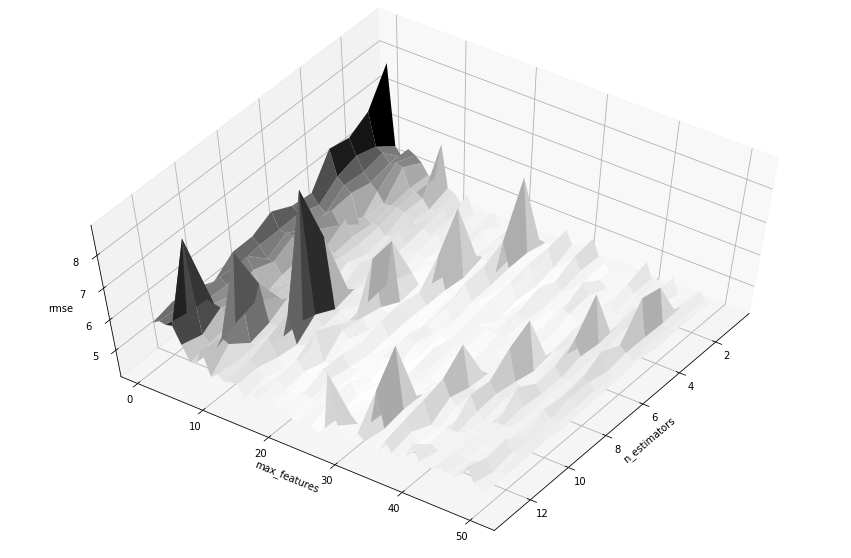

In [52]:
from mpl_toolkits import mplot3d

n_estimators, max_features = np.arange(1, 51), np.arange(1, 14)
X, Y = np.meshgrid(max_features, n_estimators)
Z = scores = np.sqrt(-rf_search_results[['mean_test_score']].values).reshape(50, 13)

fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='Greys', edgecolor='none')
ax.set_xlabel('n_estimators')
ax.set_ylabel('max_features')
ax.set_zlabel('rmse');
ax.view_init(60, 35)

In [55]:
rf_search.best_params_

{'max_features': 8, 'n_estimators': 19}

In [57]:
np.sqrt(-rf_search.best_score_)

4.198781714064752